In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [27]:
obs_da = xr.open_dataset('sos_EB_01Nov2022to18June2023.nc')

summa_da = xr.open_dataset('template_output_consettl_1hr_timestep.nc')

In [28]:
summa_da = summa_da.sel(time=slice('2022-12-01', '2023-04-01'))
obs_da = obs_da.sel(time=slice('2022-12-01', '2023-04-01'))


In [51]:
obs_da_Tsurf= obs_da['Tsurf_uw'].where((obs_da['Tsurf_uw'] >= -40) & (obs_da['Tsurf_uw'] <= 0), np.nan)


In [52]:
Tsfc_diff = summa_da['scalarSurfaceTemp'] - obs_da_Tsurf - 273.15

(-40.0, 40.0)

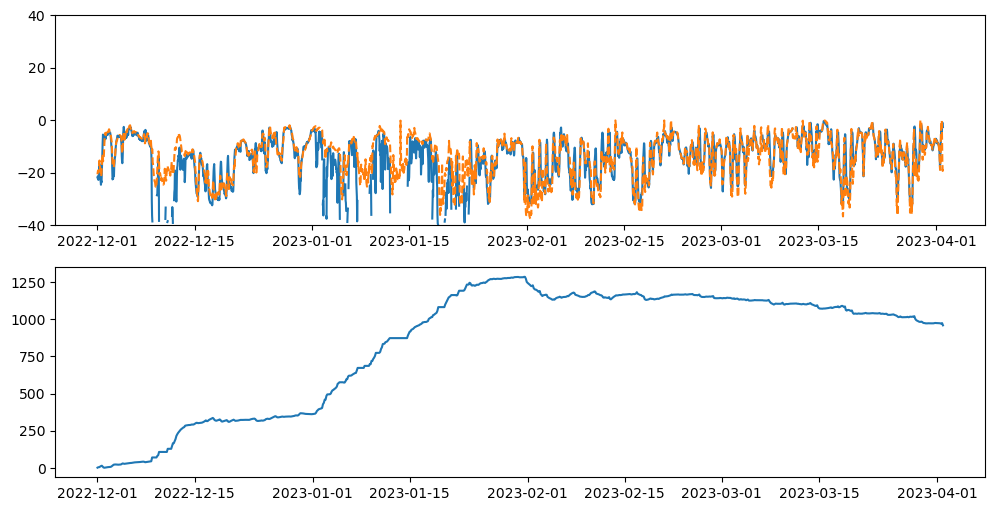

In [53]:
fig, ax = plt.subplots(2,1,figsize=(12, 6))

ax[0].plot(obs_da_Tsurf['time'], obs_da_Tsurf)
ax[0].plot(summa_da['time'], summa_da['scalarSurfaceTemp']-273.15, linestyle='--')

ax[1].plot(Tsfc_diff.time, Tsfc_diff.cumsum())

ax[0].set_ylim(-40,40)

In [35]:
Tsfc_diff

<xarray.DataArray (time: 976, hru: 1)> Size: 8kB
array([[ 4.51570966e-01],
       [ 1.99139639e+00],
       [-3.70249337e-01],
       [ 2.93566880e+00],
       [ 2.06747073e+00],
       [ 2.63460496e-01],
       [-8.90142788e+00],
       [-6.78856620e+00],
       [-2.08622074e+00],
       [ 5.66784206e-01],
       [ 6.29748315e-01],
       [ 2.18969031e-01],
       [-5.60374913e-03],
       [ 5.95034704e-02],
       [-2.62032102e-01],
       [ 4.05491632e-02],
       [ 1.76705529e+00],
       [ 3.43440364e+00],
       [ 3.83978809e+00],
       [ 3.15658052e+00],
...
       [-2.59270112e-02],
       [ 7.82147456e-01],
       [ 7.26598552e-01],
       [-1.45775769e-01],
       [-2.25189428e-01],
       [-1.19948329e-01],
       [ 2.11048066e-01],
       [-1.46314075e-01],
       [ 2.52834379e-01],
       [ 9.41614299e-01],
       [ 1.72434455e+00],
       [-7.61480285e-01],
       [-1.02719696e-01],
       [-1.04174113e-01],
       [-2.21563811e-01],
       [-2.84699038e-01],
       [-9.20802426e-01],
       [ 1.31690784e+00],
       [ 1.17380407e+00],
       [-1.49635767e+01]])
Coordinates:
  * time     (time) datetime64[ns] 8kB 2022-12-01 ... 2023-04-01T21:00:00
  * hru      (hru) int64 8B 1001